In [55]:
from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm
%matplotlib inline

## grid:

In [56]:
Lx = 2.0
Ly = 2.0
nx = 41
ny = 41
dx = Lx/(nx-1)
dy = Ly/(ny-1)

## Time:

In [57]:
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu
T = 0.027

## Initialize field u and v:

In [58]:
u = numpy.ones((ny,nx))
un = numpy.ones((ny,nx))
u[int(0.5/dy):int(1.0/dy),int(0.5/dx):int(1.0/dx)] = 2.0

v = numpy.ones((ny,nx))
vn = numpy.ones((ny,nx))
v[int(0.5/dy):int(1.0/dy),int(0.5/dx):int(1.0/dx)] = 2.0

## Plot initial condition:

In [59]:

x = numpy.linspace(0,Lx,nx)
y = numpy.linspace(0,Ly,ny)

Text(0.5, 0, '$y$')

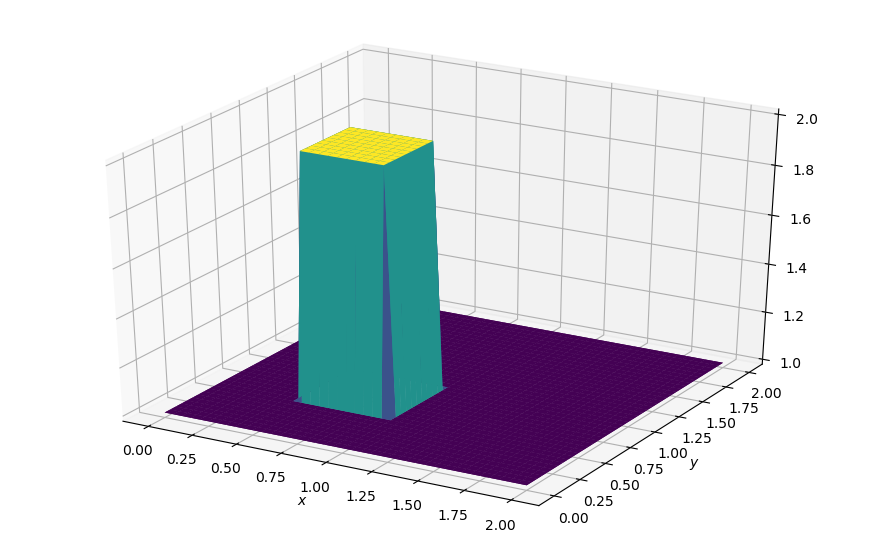

In [60]:

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

## Start time loop: 

In [61]:
t = 0.0
while t<T:
    t+=dt
    un = u.copy()
    vn = v.copy()
    u[1:-1,1:-1] = un[1:-1,1:-1] - (un[1:-1,1:-1]*dt/dx)*(un[1:-1,1:-1] - un[1:-1,0:-2]) - (vn[1:-1,1:-1]*dt/dy)*(un[1:-1,1:-1] - un[0:-2,1:-1])+(nu*dt/(dx*dx))*(un[1:-1,0:-2] - 2*un[1:-1,1:-1] + un[1:-1,2:] ) +  (nu*dt/(dy*dy))*(un[0:-2,1:-1]  - 2*un[1:-1,1:-1] + un[2:,1:-1]   ) 


    v[1:-1,1:-1] = vn[1:-1,1:-1] - (un[1:-1,1:-1]*dt/dx)*(vn[1:-1,1:-1] - vn[1:-1,0:-2]) - (vn[1:-1,1:-1]*dt/dy)*(vn[1:-1,1:-1] - vn[0:-2,1:-1])+(nu*dt/(dx*dx))*(vn[1:-1,0:-2] - 2*vn[1:-1,1:-1] + vn[1:-1,2:] ) +  (nu*dt/(dy*dy))*(vn[0:-2,1:-1]  - 2*vn[1:-1,1:-1] + vn[2:,1:-1]   ) 


## Plot python solution

Text(0.5, 0, '$y$')

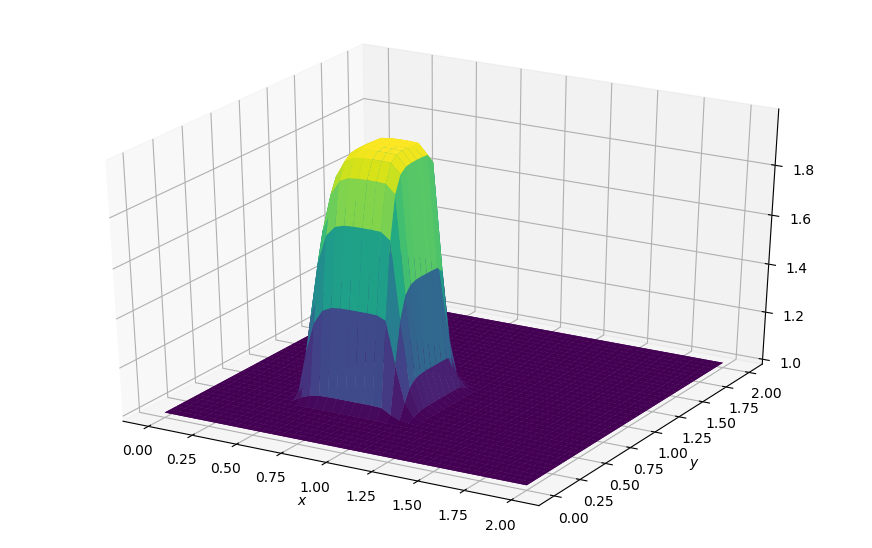

In [62]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:], cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

## Plot c++ solution:

Text(0.5, 0, '$y$')

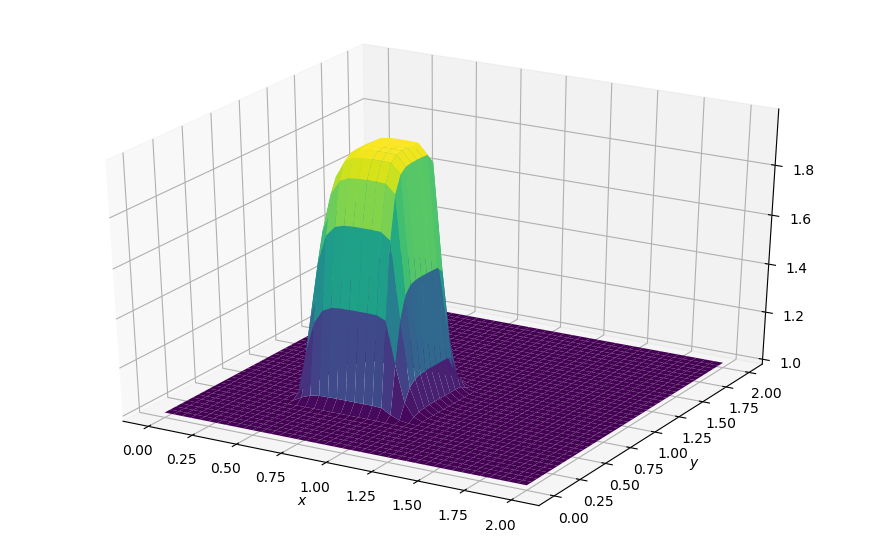

In [63]:
xc = numpy.loadtxt('plot/x.dat')
yc = numpy.loadtxt('plot/y.dat')
uc = numpy.loadtxt('plot/u.dat')

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
Xc, Yc = numpy.meshgrid(xc, yc)                            
surf = ax.plot_surface(Xc, Yc, uc[:], cmap=cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

## Error between c++ and python solution

In [64]:
error = u - uc
from numpy import linalg as LA
LA.norm(error)

7.917477952255865e-13